In [68]:
import nltk
nltk.download('wordnet')
import pandas as pd
import seaborn as sns

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sevug\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [69]:
data = pd.read_csv("spam.csv")

In [70]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [71]:
data.shape

(5572, 2)

In [72]:
data.duplicated().sum()

np.int64(415)

In [73]:
data = data.drop_duplicates()

In [74]:
data.duplicated().sum()

np.int64(0)

In [75]:
data.shape

(5157, 2)

In [76]:
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string
import re

In [90]:
stop = set(stopwords.words(("english")))
punc = set(string.punctuation)
lemmatizer = WordNetLemmatizer()

In [91]:
x = data.iloc[:,1]
y = data.iloc[:,0]

In [94]:
def clean(msg):
    msg = " ".join([i for i in msg.lower().split() if i not in stop])
    msg = "".join([i for i in msg if i not in punc])
    msg = "".join([lemmatizer.lemmatize(i) for i in msg])
    msg = re.sub(r"\d+","",msg)
    msg = re.sub(r"\s+"," ",msg)
    return msg

In [95]:
x = x.apply(clean)

In [81]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(x)

<Axes: xlabel='Category', ylabel='count'>

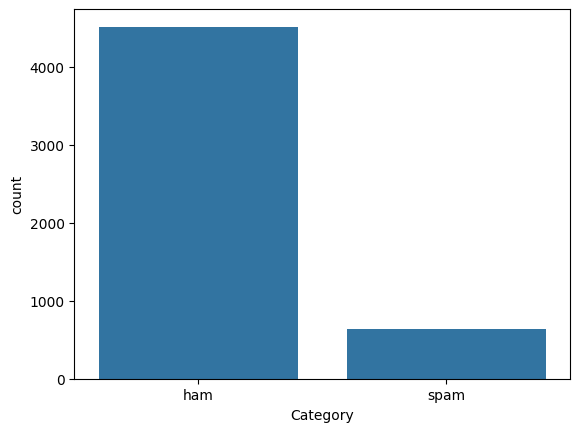

In [82]:
sns.countplot(data, x=data.Category)

In [83]:
from sklearn.model_selection import  train_test_split
from sklearn.naive_bayes import MultinomialNB

In [88]:
# count = 0
# acc = 0.0
nb = MultinomialNB()
# for i in range(101):
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, shuffle=True, random_state=37)
nb.fit(x_train,y_train)

y_pred = nb.predict(x_test)

from sklearn.metrics import f1_score, accuracy_score
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy Score: {accuracy:.2f}")

# if score> acc:
#     count = i
#     acc = score

# print(f"Count: {count}, accuracy: {acc}")

F1 Score: 0.97
Accuracy Score: 0.97


In [89]:
import pickle
model = r"C:\Users\sevug\Desktop\New folder\bigdatahandson\spam_or_ham_predicition\Testing\naive_bayes.pkl"
pickle.dump(nb,open(model,'wb'))

vector = r"C:\Users\sevug\Desktop\New folder\bigdatahandson\spam_or_ham_predicition\Testing\count_vectorizer.pkl"
pickle.dump(vectorizer,open(vector,'wb'))